In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
import scipy.stats as stats
import numpy as np
import pingouin as pg

df = pd.read_csv("assessment_da25.csv")

print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB
None


,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.00,0,2,74,0
1,A,4,0.00,4,1,21,1
2,A,4,0.00,2,0,1,2
3,A,5,0.00,0,1,26,3
4,A,5,0.00,3,3,46,4
...,...,...,...,...,...,...,...
1995,B,3,0.00,1,0,1,1995
1996,B,3,0.00,1,2,31,1996
1997,B,3,0.00,2,0,3,1997
1998,B,4,87.08,2,1,11,1998


### Compare the variants by GMV

In [90]:
# Want to compare the amount of 'number of add to cart' with each variant.


var_A = df[df["Variant"].str.contains("A")]
var_B = df[df["Variant"].str.contains("B")]


avg_var_A = var_A["GMV (in $)"].sum().round()/1000
avg_var_B = var_B["GMV (in $)"].sum().round()/1000

print(f" The average GMV for variant A is $", avg_var_A)
print(f" The average GMV for variant B is $", avg_var_B)

 The average GMV for variant A is $ 7.69
 The average GMV for variant B is $ 9.29


### Compare number add to cart

In [95]:
var_A = df[df["Variant"].str.contains("A")]
var_B = df[df["Variant"].str.contains("B")]

num_cart_A = var_A["Number of add to cart"].sum()/1000
num_cart_B = var_B["Number of add to cart"].sum()/1000

print(f" The average of number added to cart", num_cart_A)
print(f" The average of number added to cart", num_cart_B)

 The average of number added to cart 1.884
 The average of number added to cart 2.469


### Which variant made more adds to cart.

In [102]:
var_A = df[df["Variant"].str.contains("A")]
var_B = df[df["Variant"].str.contains("B")]


num_cart_A = var_A["Number of add to cart"].sum()
num_cart_B = var_B["Number of add to cart"].sum()

print(num_cart_A)
num_cart_B

1884


2469

In [125]:
mean_df = df.groupby("Variant").sum()
mean_df


,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
Variant,,,,,,
A,4985,7689.99,1884,1495,20543,499500
B,5317,9289.53,2469,1324,20047,1499500


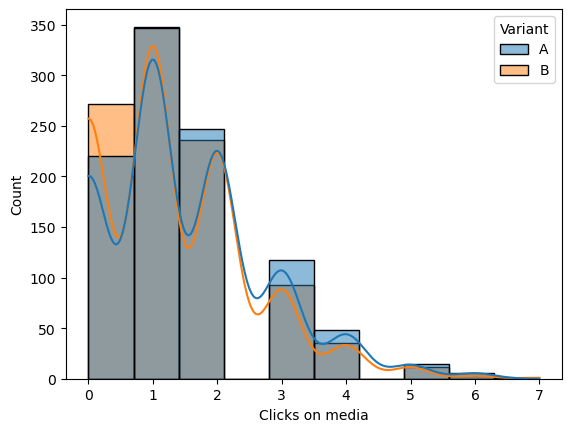

In [122]:
sns.histplot(data=df, x="Clicks on media", bins=10, hue="Variant", kde=True)
plt.show()

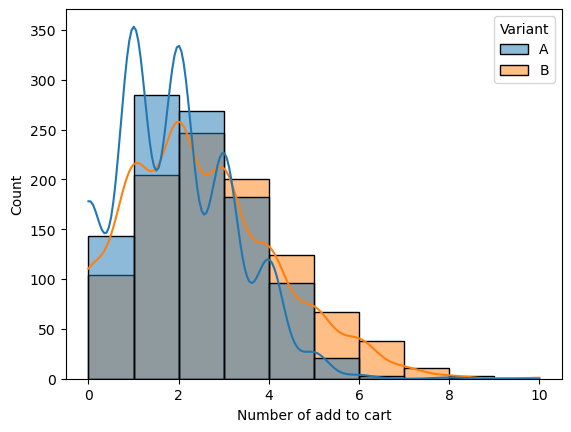

In [129]:
sns.histplot(data=df, x="Number of add to cart", bins=10, hue="Variant", kde=True)
plt.show()

In [16]:
df_count_A = len(df[(df["Variant"] == 'A') & (df["Number of add to cart"] >= 1 ) & (df["GMV (in $)"] > 0.1 )])
df_count_B = len(df[(df["Variant"] == 'B') & (df["Number of add to cart"] >= 1 ) & (df["GMV (in $)"] > 0.1 )])

print(f" Variant A made {df_count_A} amount of sales")
print(f" Variant B made {df_count_B} amount of sales")

 Variant A made 80 amount of sales
 Variant B made 97 amount of sales


In [14]:
num_A = df[df['Variant'] == "A"]["Clicks on media"]
num_B = df[df['Variant'] == 'B']["Clicks on media"]

num_test = pg.ttest(num_A, num_B, paired=False, alternative="greater")

num_test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.17107,1998,greater,0.000771,"[0.08, inf]",0.141815,14.612,0.936388


In [7]:
# Mann-Whitney U test using pg.mwu

clicks_A = df[df['Variant'] == "A"]["Number of add to cart"]
clicks_B = df[df['Variant'] == 'B']["Number of add to cart"]

mwu = pg.mwu(clicks_A, clicks_B, alternative="greater")

print(mwu)

        U-val alternative  p-val      RBC     CLES
MWU  403630.0     greater    1.0  0.19274  0.40363


In [23]:
# Ttest using pg.ttest

num_A = df[df['Variant'] == "A"]["Number of add to cart"]
num_B = df[df['Variant'] == 'B']["Number of add to cart"]

num_test = pg.ttest(num_A, num_B, paired=False, alternative="greater")

num_test

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.777389,1998,greater,1.0,"[-0.69, inf]",0.392537,4.891e-16,0.0
